In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Hierarchical Clustering**

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

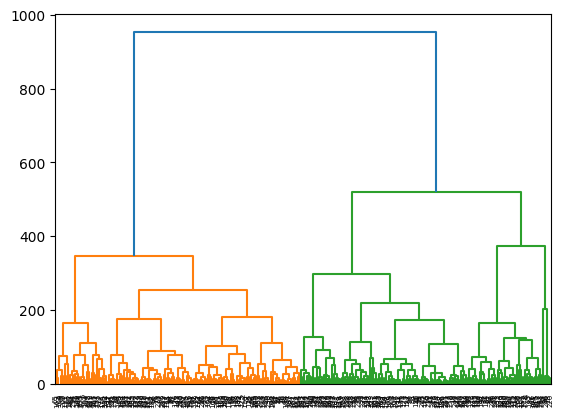

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df)

# **PCA**

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [13]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

In [14]:
# Convert the NumPy array to a Pandas DataFrame
df_pca_df = pd.DataFrame(df_pca)
df_pca_df.head(10)

,0,1
0,-12.267726,2.870002
1,2.689662,-39.873863
2,-42.950640,-23.639530
3,-10.945206,-28.441101
4,106.978583,-15.879436
5,-53.647568,4.000364
6,48.081738,-3.043351
7,15.565603,-26.278060
8,-45.439279,-7.432122
9,-77.316716,-19.912027


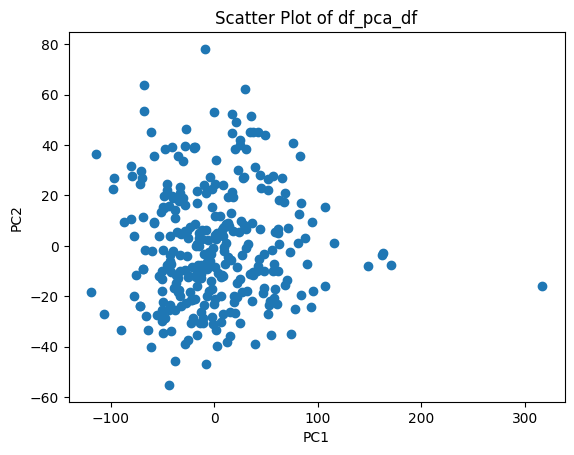

In [15]:
plt.scatter(df_pca_df[0], df_pca_df[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of df_pca_df')
plt.show()

# **Non-Hierarchical Clustering (K-Means)**

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

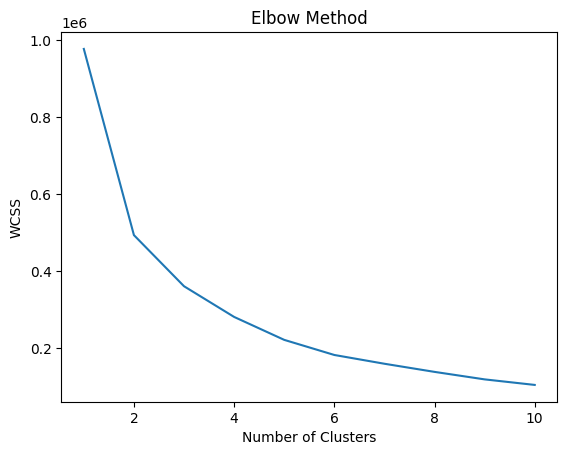

In [18]:
# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

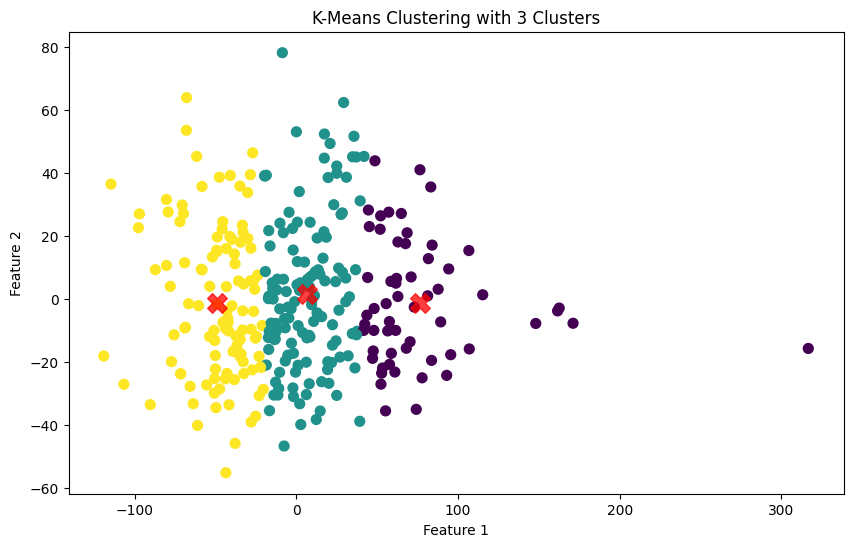

In [19]:
best_k = 3

# Fit KMeans with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=0)
y_kmeans = kmeans.fit_predict(df_pca)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {best_k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **SVD**

In [20]:
import numpy as np

In [21]:
U, s, VT = np.linalg.svd(df)

In [22]:
U, s, VT

(array([[-0.05636929, -0.02850207, -0.04085733, ..., -0.08390192,
         -0.05496342, -0.06795732],
        [-0.05986733, -0.03977895,  0.07626224, ..., -0.00372041,
         -0.00899212,  0.07706121],
        [-0.05246462, -0.06991173,  0.03390344, ...,  0.0827582 ,
          0.05925754, -0.02134654],
        ...,
        [-0.05023843, -0.0586641 , -0.07077805, ...,  0.94027259,
         -0.01234797,  0.00652965],
        [-0.03830243, -0.0823452 , -0.09417846, ..., -0.01108804,
          0.96260579, -0.0018657 ],
        [-0.05748102, -0.04181408,  0.03469446, ...,  0.00204655,
          0.00097317,  0.95076195]]),
 array([5644.6664556 ,  618.50361256,  359.82156517,  151.3869315 ,
          21.16606964,   17.59650655,   15.90569999,   11.03786891,
           9.39069   ,    8.02745278,    7.65988188,    6.68911339,
           5.91826788,    5.69123411]),
 array([[-1.66860382e-01, -2.04876625e-03, -2.95846005e-03,
         -4.04326706e-01, -7.72982675e-01, -4.60336499e-04,
         

# **Analisis Faktor**

In [23]:
!pip install factor_analyzer

In [24]:
!pip install factor_analyzer --upgrade # Upgrade to the latest version

import factor_analyzer as FactorAnalyzer

In [25]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

Sebelum melakukan analisis faktor, Anda perlu mengevaluasi "faktorabilitas" dari dataset Anda. Faktorabilitas berarti "dapatkah kita menemukan faktor-faktor dalam dataset?". Ada dua metode untuk memeriksa faktorabilitas atau kecukupan sampel:
- Uji Bartlett
- Uji Kaiser-Meyer-Olkin (KMO)

Uji Bartlett’s Test of Sphericity memeriksa apakah variabel-variabel yang diamati saling berkorelasi menggunakan matriks korelasi yang diamati terhadap matriks identitas. Jika uji ini ditemukan tidak signifikan secara statistik, Anda sebaiknya tidak menggunakan analisis faktor.

In [26]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(775.2658089835352, 4.372026836788896e-109)


Dalam uji Bartlett ini, nilai p mendekati 0. Uji ini signifikan secara statistik, yang menunjukkan bahwa matriks korelasi yang diamati bukanlah matriks identitas

Uji Kaiser-Meyer-Olkin (KMO) mengukur kesesuaian data untuk analisis faktor. Uji ini menentukan kecukupan untuk setiap variabel yang diamati dan untuk model keseluruhan. KMO mengestimasi proporsi varians di antara semua variabel yang diamati. Proporsi yang lebih rendah lebih cocok untuk analisis faktor. Nilai KMO berkisar antara 0 dan 1.

In [29]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7326958044099285

Nilai KMO keseluruhan untuk data diatas adalah 0,73, yang dianggap sangat baik. Nilai ini menunjukkan bahwa Anda dapat melanjutkan dengan analisis faktor yang direncanakan.

In [30]:
# Melakukan Analisis Faktor
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df)
fa_components = fa.transform(df)

# Menghitung eigenvalue dari matriks kovarians
cov_matrix = np.cov(df, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'Eigenvalues: {eigenvalues}')

# Membuat DataFrame untuk komponen faktor
factor_df = pd.DataFrame(data=fa_components, columns=['Factor1', 'Factor2','Factor3', 'Factor4', 'Factor5'])

# Menampilkan hasil Analisis Faktor
print("\nKomponen Faktor:")
print(factor_df.head())

Eigenvalues: [2.69586730e+03 5.42310975e+02 3.05074420e+02 5.84780439e+01
 1.44570855e+00 1.02439701e+00 8.25985953e-01 3.71280738e-01
 2.82883684e-01 1.01306795e-01 1.15954910e-01 1.47822188e-01
 1.89675533e-01 2.12092343e-01]

Komponen Faktor:
    Factor1   Factor2   Factor3   Factor4   Factor5
0 -1.816595 -1.877897  0.057550  1.301196 -0.510117
1 -0.920269 -2.383290  1.998592 -0.582189 -0.464652
2 -0.597860  0.280740  0.772586 -0.827328  0.366346
3 -0.457381  0.721468  0.601451 -0.156293 -0.187945
4  0.044783  0.737305  0.029179 -0.677815  1.766738


In [31]:
# Get variance of each factors
fa.get_factor_variance()

(array([1.74180765, 1.28636598, 0.94312281, 0.91736832, 0.64602421]),
 array([0.12441483, 0.09188328, 0.06736592, 0.06552631, 0.04614459]),
 array([0.12441483, 0.21629812, 0.28366403, 0.34919034, 0.39533493]))

Sebanyak 39% varians kumulatif dijelaskan oleh 5 faktor.